# Dealing with missing values

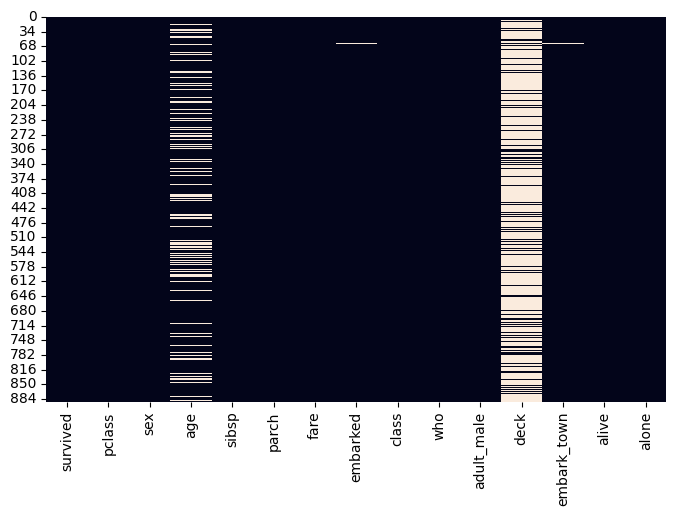

In [5]:
# import libraries
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load titanic dataset
data= sns.load_dataset('titanic')

# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# check all missing values in ascending order in dataset
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [12]:
# missing values in % in ascending order and just upto 2 decimal points
# data.isnull().sum() / len(data) * 100-->in % only 
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)


deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

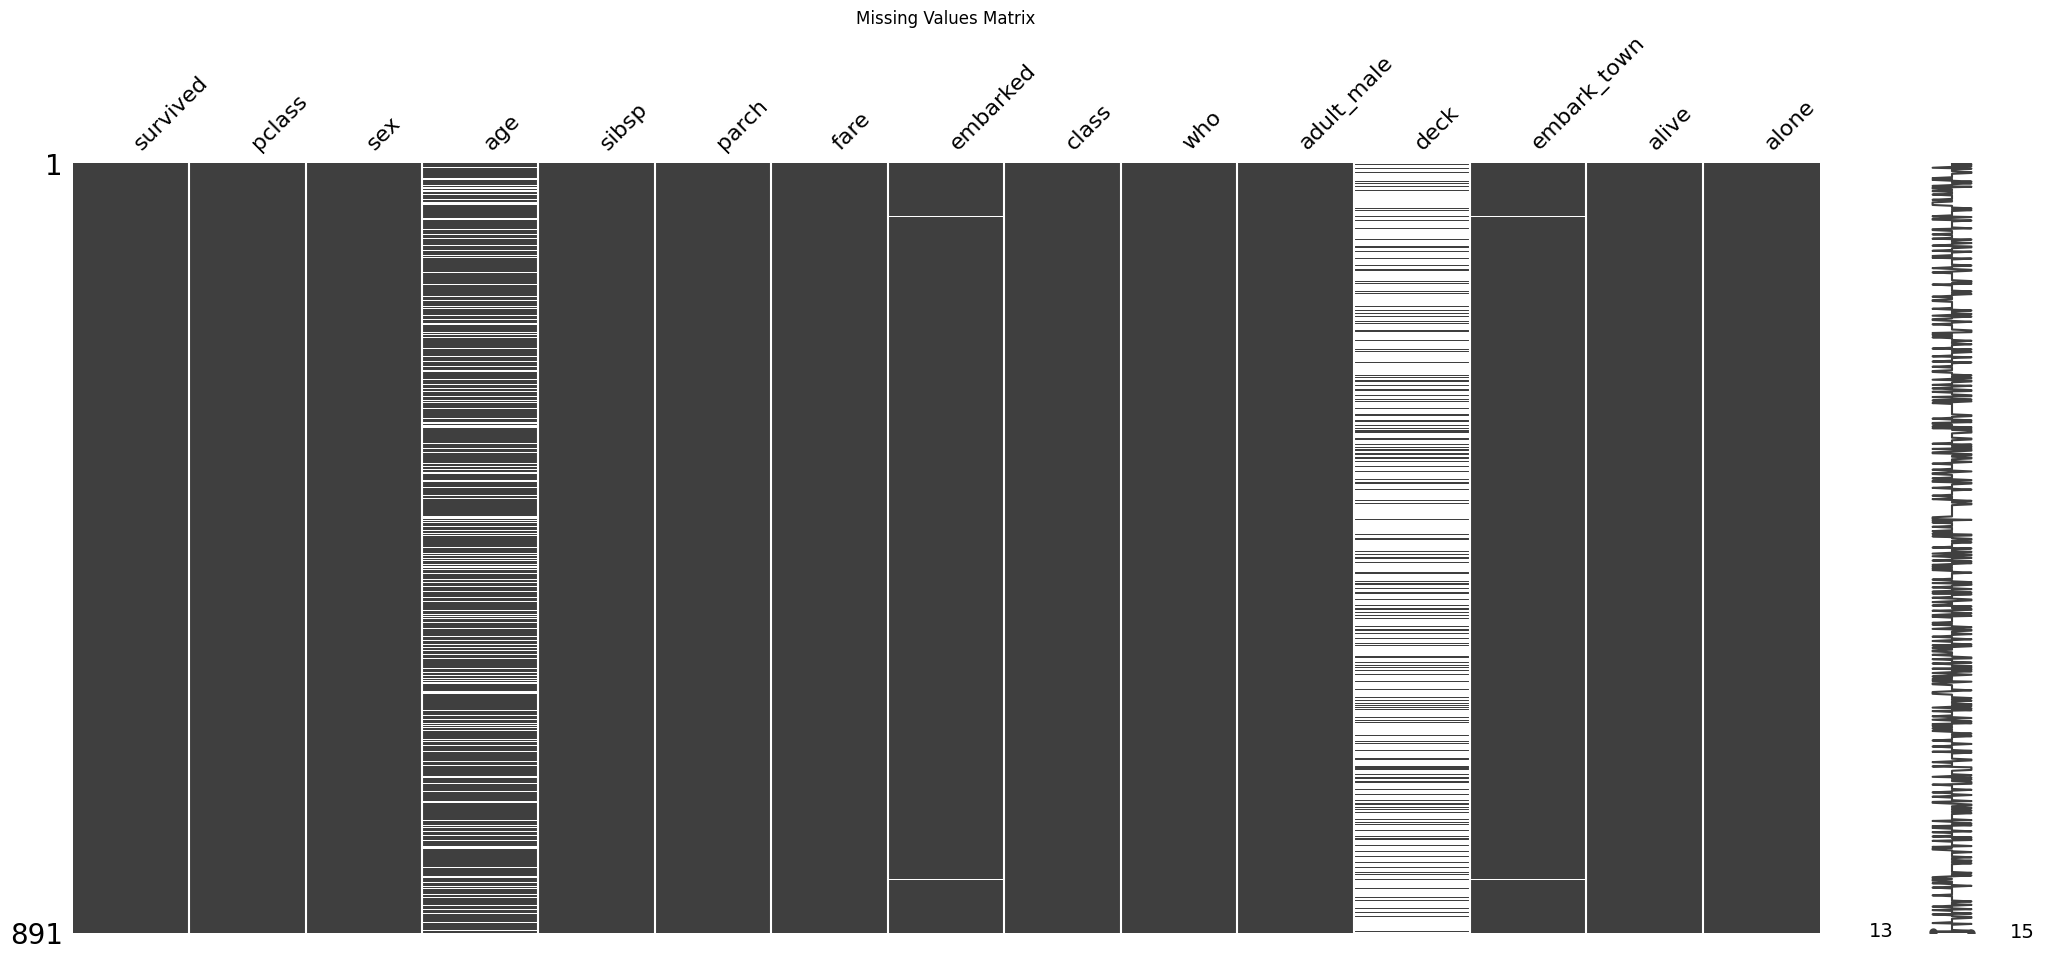

In [18]:
# another way to represent missing values using missingno values

import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using missingno
msno.matrix(data)
plt.title('Missing Values Matrix')
plt.show()



#### Now there are two columns which contain the highest number of missing values i.e age and deck 


In [19]:
# we now impute the age column through mean, mode and median

round(data['age'].mean(), 2)

29.7

In [20]:
data['age'].median()

28.0

In [23]:
# Mean of age to fill age missing values
data['age'] = data['age'].fillna(data['age'].median())

In [24]:
# check if the age column values have been imputed 
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [25]:
# remove/drop the deck column as it already contains more than 75% missing values
data.drop('deck', axis=1, inplace=True)

In [26]:
data.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

### Now still there are two columns named as embarked_town and embarked that contain the missing value as 2,2 so we have impute them as well 


In [28]:
data['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [37]:
# replacing embark_town missing values with mode 
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])


In [38]:
data.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
embar_town     0
dtype: int64

### we can also impute using sk learn


In [41]:
import pandas as pd
import numpy as np 

from sklearn.impute import SimpleImputer

In [47]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
# impute age column using SimpleImputer(from univariate only) from sklearn
imputer = SimpleImputer(strategy ='median')
df['age'] = imputer.fit_transform(df[['age']])

In [51]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

## Multivariate imputation

In [61]:
df = sns.load_dataset('titanic')

In [55]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [63]:
# sklearn library for multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column using Iterativeimputer from sklearn
imputer = IterativeImputer()
df['age'] = imputer.fit_transform(df[['age']])

In [64]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

## ffill and backward fill

In [ ]:
# using forward fill impute age column 
df['age'] = df['age'].fillna(method= 'ffill')